In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_all = pd.read_csv('cleaned_wikidata22.csv')
df = df_all[['Month','Python']]
df.head()

,Month,Python
0,2015-07,1129
1,2015-08,1545
2,2015-09,2196
3,2015-10,1985
4,2015-11,2187


22:45:49 - cmdstanpy - INFO - Chain [1] start processing
22:45:50 - cmdstanpy - INFO - Chain [1] done processing


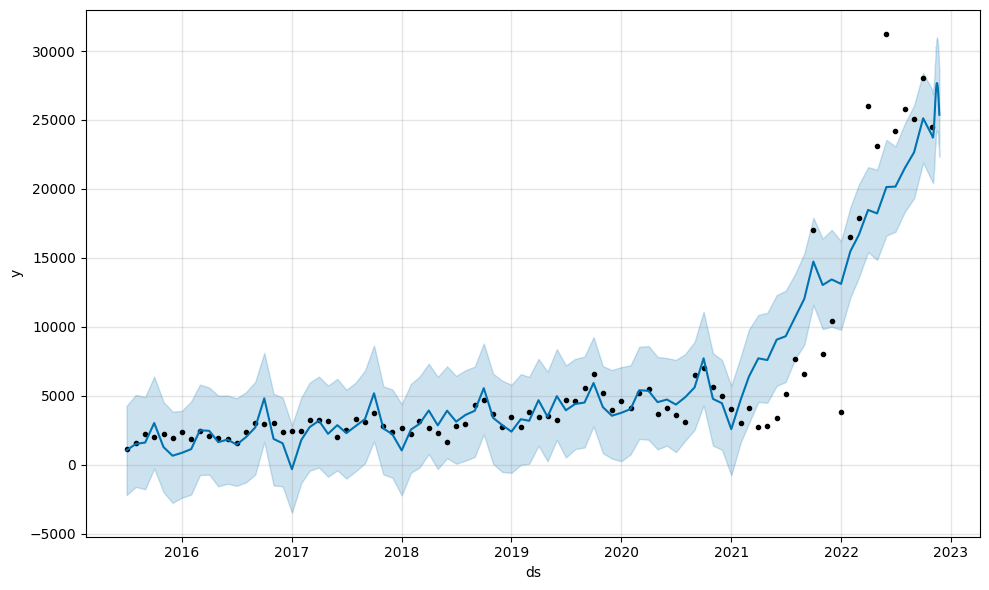

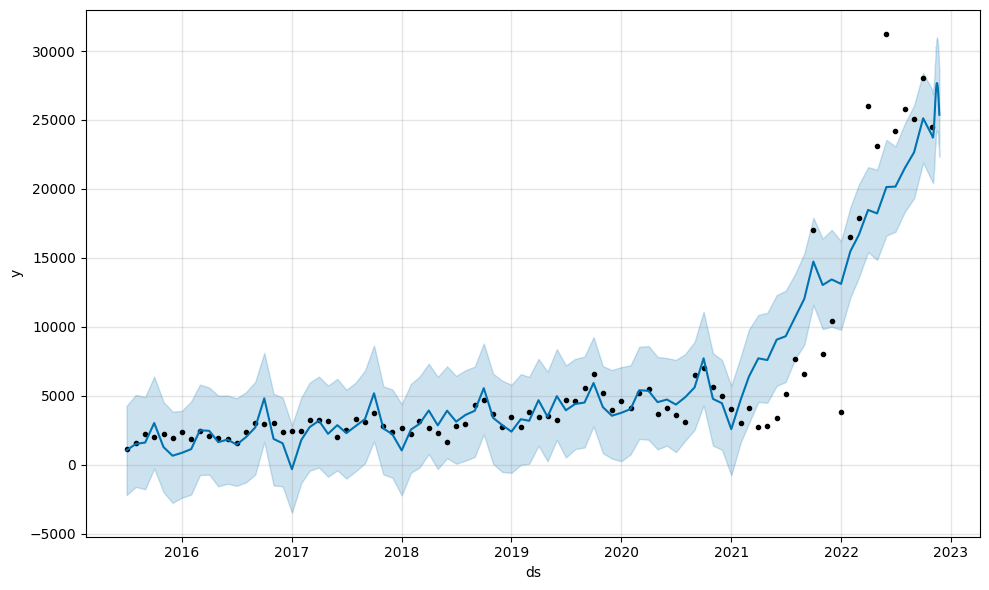

In [3]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

prophet_df = train.reset_index(drop=True)
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

# Plot
prophet_model.plot(forecast)

In [4]:
test_df = test.reset_index(drop=True)
test_df.columns = ['ds', 'y']  

forecast_test = forecast[-len(test):] 

mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 22355.463523266997
MSE: 512215765.62988025
RMSE: 22632.184287644006


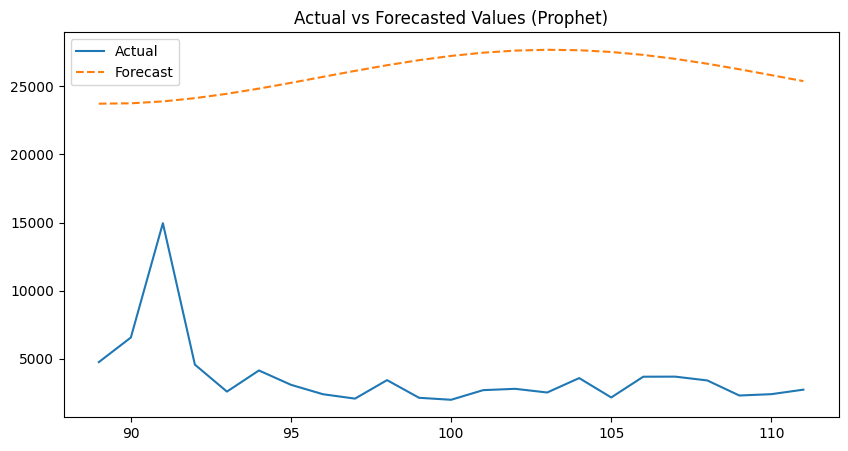

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test_df['y'], label='Actual')
plt.plot(test.index, forecast_test['yhat'], label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values (Prophet)")
plt.show()

In [6]:
languages = list(df_all.columns)
languages.remove('Month')

d = {}
d['language']=[]
d['mae'] = []
d['mse'] = []
d['rmse'] = []

for language in languages:
    df1=df_all[['Month', language]]
    train_size = int(len(df1) * 0.8)
    train, test = df1[:train_size], df1[train_size:]

    prophet_df = train.reset_index(drop=True)
    prophet_df.columns = ['ds', 'y']

    prophet_model = Prophet()
    prophet_model.fit(prophet_df)

    future = prophet_model.make_future_dataframe(periods=len(test))
    forecast = prophet_model.predict(future)

    test_df = test.reset_index(drop=True)
    test_df.columns = ['ds', 'y']  

    forecast_test = forecast[-len(test):] 

    mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
    mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
    rmse = np.sqrt(mse)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

    d['language'].append(language)
    d['mae'].append(mae)
    d['mse'].append(mse)
    d['rmse'].append(rmse)

df_res = pd.DataFrame.from_dict(d)
df_res.to_csv('result_prophet.csv',index=False)


22:45:51 - cmdstanpy - INFO - Chain [1] start processing
22:45:52 - cmdstanpy - INFO - Chain [1] done processing
22:45:53 - cmdstanpy - INFO - Chain [1] start processing


MAE: 206.444083391819
MSE: 57594.336906723416
RMSE: 239.9882015990024


22:45:53 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1727.5232227318559
MSE: 4100738.697216204
RMSE: 2025.0280731921234


22:45:54 - cmdstanpy - INFO - Chain [1] start processing
22:45:54 - cmdstanpy - INFO - Chain [1] done processing
22:45:55 - cmdstanpy - INFO - Chain [1] start processing


MAE: 1467.6938378516813
MSE: 3204404.759151005
RMSE: 1790.0851262303156


22:45:55 - cmdstanpy - INFO - Chain [1] done processing
22:45:56 - cmdstanpy - INFO - Chain [1] start processing


MAE: 22355.463523266997
MSE: 512215765.62988025
RMSE: 22632.184287644006


22:45:56 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1916.4774501638283
MSE: 4761710.169089436
RMSE: 2182.134315089114


22:45:57 - cmdstanpy - INFO - Chain [1] start processing
22:45:57 - cmdstanpy - INFO - Chain [1] done processing


MAE: 35.221038656091835
MSE: 2068.3815408227415
RMSE: 45.47946284668215


22:45:58 - cmdstanpy - INFO - Chain [1] start processing
22:45:58 - cmdstanpy - INFO - Chain [1] done processing
22:45:59 - cmdstanpy - INFO - Chain [1] start processing


MAE: 3727.8129343173528
MSE: 18796211.591064822
RMSE: 4335.459790041285


22:45:59 - cmdstanpy - INFO - Chain [1] done processing
22:45:59 - cmdstanpy - INFO - Chain [1] start processing


MAE: 5937.971444180878
MSE: 47160456.16547033
RMSE: 6867.347098077272


22:46:00 - cmdstanpy - INFO - Chain [1] done processing
22:46:00 - cmdstanpy - INFO - Chain [1] start processing


MAE: 127.21111064352236
MSE: 21424.03527104996
RMSE: 146.36951619462968


22:46:01 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1198.3966259073861
MSE: 2285173.6540779965
RMSE: 1511.6790843555375


22:46:01 - cmdstanpy - INFO - Chain [1] start processing
22:46:02 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1158.867194157459
MSE: 1838280.4593232085
RMSE: 1355.8320173691166


22:46:03 - cmdstanpy - INFO - Chain [1] start processing
22:46:04 - cmdstanpy - INFO - Chain [1] done processing
22:46:04 - cmdstanpy - INFO - Chain [1] start processing


MAE: 672.175835976778
MSE: 514331.660569081
RMSE: 717.169199400728


22:46:05 - cmdstanpy - INFO - Chain [1] done processing
22:46:05 - cmdstanpy - INFO - Chain [1] start processing


MAE: 39.61086303672868
MSE: 2037.0308779376955
RMSE: 45.133478460425536


22:46:07 - cmdstanpy - INFO - Chain [1] done processing


MAE: 253.78457938935887
MSE: 80599.34719990233
RMSE: 283.90024163410345


22:46:07 - cmdstanpy - INFO - Chain [1] start processing
22:46:08 - cmdstanpy - INFO - Chain [1] done processing
22:46:08 - cmdstanpy - INFO - Chain [1] start processing


MAE: 228.7636625675271
MSE: 61821.77521914649
RMSE: 248.63985042455784


22:46:09 - cmdstanpy - INFO - Chain [1] done processing
22:46:09 - cmdstanpy - INFO - Chain [1] start processing


MAE: 213.99546561010945
MSE: 64025.9257820119
RMSE: 253.03344795107998


22:46:09 - cmdstanpy - INFO - Chain [1] done processing
22:46:09 - cmdstanpy - INFO - Chain [1] start processing


MAE: 3232.9277445421494
MSE: 15448524.418882914
RMSE: 3930.461094945848


22:46:10 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2062.938113564785
MSE: 5289974.24444502
RMSE: 2299.9944009594938


22:46:10 - cmdstanpy - INFO - Chain [1] start processing
22:46:11 - cmdstanpy - INFO - Chain [1] done processing


MAE: 856.7221196121483
MSE: 862745.573719708
RMSE: 928.8409840870007


22:46:11 - cmdstanpy - INFO - Chain [1] start processing
22:46:12 - cmdstanpy - INFO - Chain [1] done processing
22:46:12 - cmdstanpy - INFO - Chain [1] start processing


MAE: 311.35548537919976
MSE: 111020.3628087293
RMSE: 333.1971830744211


22:46:13 - cmdstanpy - INFO - Chain [1] done processing
22:46:13 - cmdstanpy - INFO - Chain [1] start processing


MAE: 606.5988565979136
MSE: 456118.0973206181
RMSE: 675.3651585036188


22:46:14 - cmdstanpy - INFO - Chain [1] done processing


MAE: 193.75370624672843
MSE: 46257.27631423485
RMSE: 215.075048097716
MAE: 12.26086956521739
MSE: 761.0434782608696
RMSE: 27.587016479874542


22:46:14 - cmdstanpy - INFO - Chain [1] start processing
22:46:15 - cmdstanpy - INFO - Chain [1] done processing
22:46:15 - cmdstanpy - INFO - Chain [1] start processing


MAE: 1056.884819465836
MSE: 1350559.6273682457
RMSE: 1162.1358041847973


22:46:15 - cmdstanpy - INFO - Chain [1] done processing
22:46:16 - cmdstanpy - INFO - Chain [1] start processing


MAE: 14.573638045067248
MSE: 345.71658551565355
RMSE: 18.593455448508045


22:46:16 - cmdstanpy - INFO - Chain [1] done processing
22:46:17 - cmdstanpy - INFO - Chain [1] start processing


MAE: 64.99246382569346
MSE: 5972.975128711097
RMSE: 77.28502525529183


22:46:17 - cmdstanpy - INFO - Chain [1] done processing


MAE: 293.5637240412715
MSE: 102736.17714632444
RMSE: 320.5248463790669


22:46:18 - cmdstanpy - INFO - Chain [1] start processing
22:46:18 - cmdstanpy - INFO - Chain [1] done processing
22:46:18 - cmdstanpy - INFO - Chain [1] start processing


MAE: 1915.0540842216706
MSE: 4932833.096569333
RMSE: 2220.9982207487997


22:46:20 - cmdstanpy - INFO - Chain [1] done processing


MAE: 213.4088535790059
MSE: 89210.1896466278
RMSE: 298.6807487044115


22:46:20 - cmdstanpy - INFO - Chain [1] start processing
22:46:21 - cmdstanpy - INFO - Chain [1] done processing
22:46:21 - cmdstanpy - INFO - Chain [1] start processing


MAE: 3532.421970017681
MSE: 14404145.366955612
RMSE: 3795.2793529535625


22:46:22 - cmdstanpy - INFO - Chain [1] done processing


MAE: 161.7092370951577
MSE: 30135.090059523507
RMSE: 173.5946141431914


22:46:22 - cmdstanpy - INFO - Chain [1] start processing
22:46:24 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1507.927244866635
MSE: 3272720.04758264
RMSE: 1809.066070540996


22:46:24 - cmdstanpy - INFO - Chain [1] start processing
22:46:25 - cmdstanpy - INFO - Chain [1] done processing
22:46:25 - cmdstanpy - INFO - Chain [1] start processing


MAE: 84.27146555835125
MSE: 9662.442195497517
RMSE: 98.29772222944699


22:46:26 - cmdstanpy - INFO - Chain [1] done processing
22:46:26 - cmdstanpy - INFO - Chain [1] start processing


MAE: 21.927321177217976
MSE: 564.4695728718735
RMSE: 23.75856840956276


22:46:27 - cmdstanpy - INFO - Chain [1] done processing


MAE: 103.56279853858396
MSE: 12402.692578858772
RMSE: 111.36737663633265


22:46:27 - cmdstanpy - INFO - Chain [1] start processing
22:46:28 - cmdstanpy - INFO - Chain [1] done processing


MAE: 136.7792635847171
MSE: 20091.339004292793
RMSE: 141.7439205196921


22:46:28 - cmdstanpy - INFO - Chain [1] start processing
22:46:29 - cmdstanpy - INFO - Chain [1] done processing
22:46:29 - cmdstanpy - INFO - Chain [1] start processing


MAE: 61.087736499173694
MSE: 5905.1798679597205
RMSE: 76.84516814972638


22:46:30 - cmdstanpy - INFO - Chain [1] done processing


MAE: 407.2793530263124
MSE: 212748.338372075
RMSE: 461.2465049971382


22:46:30 - cmdstanpy - INFO - Chain [1] start processing
22:46:31 - cmdstanpy - INFO - Chain [1] done processing


MAE: 816.9144647389404
MSE: 778603.7447206374
RMSE: 882.3852586714249


22:46:31 - cmdstanpy - INFO - Chain [1] start processing
22:46:32 - cmdstanpy - INFO - Chain [1] done processing
22:46:32 - cmdstanpy - INFO - Chain [1] start processing


MAE: 4196.419015098776
MSE: 21802490.06740281
RMSE: 4669.313661278584


22:46:33 - cmdstanpy - INFO - Chain [1] done processing
22:46:33 - cmdstanpy - INFO - Chain [1] start processing


MAE: 183.96856538752408
MSE: 40389.48255676178
RMSE: 200.97134760149711


22:46:35 - cmdstanpy - INFO - Chain [1] done processing


MAE: 258.64586730248334
MSE: 77753.84067843933
RMSE: 278.84375674997517


22:46:35 - cmdstanpy - INFO - Chain [1] start processing
22:46:35 - cmdstanpy - INFO - Chain [1] done processing


MAE: 363.1641586148215
MSE: 155829.55482692452
RMSE: 394.75252352192064


22:46:36 - cmdstanpy - INFO - Chain [1] start processing
22:46:37 - cmdstanpy - INFO - Chain [1] done processing
22:46:37 - cmdstanpy - INFO - Chain [1] start processing


MAE: 149.11152672566118
MSE: 29513.79391411666
RMSE: 171.79579131665787


22:46:38 - cmdstanpy - INFO - Chain [1] done processing
22:46:38 - cmdstanpy - INFO - Chain [1] start processing


MAE: 18356.456387867587
MSE: 363891121.63414925
RMSE: 19075.93042643397


22:46:39 - cmdstanpy - INFO - Chain [1] done processing
22:46:39 - cmdstanpy - INFO - Chain [1] start processing


MAE: 822.5130289126274
MSE: 888710.913994196
RMSE: 942.7146514158969


22:46:39 - cmdstanpy - INFO - Chain [1] done processing


MAE: 635.3703878147968
MSE: 431041.4341499965
RMSE: 656.5374582992173


22:46:40 - cmdstanpy - INFO - Chain [1] start processing
22:46:41 - cmdstanpy - INFO - Chain [1] done processing
22:46:41 - cmdstanpy - INFO - Chain [1] start processing


MAE: 4726.453536224587
MSE: 27549554.278186124
RMSE: 5248.766929306932


22:46:41 - cmdstanpy - INFO - Chain [1] done processing


MAE: 5778.957571459481
MSE: 45695640.16101325
RMSE: 6759.855039940816
